In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# 1. Load model
model = load_model("model/banknote_classifier_mobilenetv2.h5",
                   custom_objects={'preprocess_input': preprocess_input})

In [2]:
# 2. Load validation dataset (same settings as training)
IMAGE_SIZE = 224
BATCH_SIZE = 32

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    labels="inferred",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,  # Important: no shuffle for correct label alignment
    seed=123,
    validation_split=0.3,
    subset="validation"
)

Found 6827 files belonging to 32 classes.
Using 2048 files for validation.


In [3]:
print(val_dataset.class_names)

['EUR_100_back', 'EUR_100_front', 'EUR_10_back', 'EUR_10_front', 'EUR_200_back', 'EUR_200_front', 'EUR_20_back', 'EUR_20_front', 'EUR_500_back', 'EUR_500_front', 'EUR_50_back', 'EUR_50_front', 'EUR_5_back', 'EUR_5_front', 'KRW_10000_back', 'KRW_10000_front', 'KRW_1000_back', 'KRW_1000_front', 'KRW_50000_back', 'KRW_50000_front', 'KRW_5000_back', 'KRW_5000_front', 'THB_1000_back', 'THB_1000_front', 'THB_100_back', 'THB_100_front', 'THB_20_back', 'THB_20_front', 'THB_500_back', 'THB_500_front', 'THB_50_back', 'THB_50_front']


In [4]:
print(val_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 32), dtype=tf.float32, name=None))>


In [5]:
class_names = val_dataset.class_names
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

# 3. Evaluate model (optional)
loss, acc = model.evaluate(val_dataset)
print(f"Validation Loss: {loss:.4f}, Accuracy: {acc:.4f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 469ms/step - accuracy: 0.9866 - loss: 0.0690
Validation Loss: 0.0686, Accuracy: 0.9854


In [6]:
print(val_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 32), dtype=tf.float32, name=None))>


In [7]:
# 4. Get predictions and ground truths
y_true = []
y_pred = []

for images, labels in val_dataset:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [8]:
# 5. Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get the full list of expected label indices
all_labels = list(range(len(class_names)))

# Use labels to align predictions with class_names
report = classification_report(
    y_true,
    y_pred,
    labels=all_labels,             # all expected class indices, e.g., [0, 1, ..., 7]
    target_names=class_names,      # class names from your dataset
    zero_division=0                # avoid divide-by-zero warnings
)

print("Classification Report:\n", report)

Classification Report:
                  precision    recall  f1-score   support

   EUR_100_back       0.98      1.00      0.99        40
  EUR_100_front       1.00      1.00      1.00        21
    EUR_10_back       1.00      0.77      0.87        13
   EUR_10_front       0.95      1.00      0.97        54
   EUR_200_back       0.97      0.97      0.97        29
  EUR_200_front       0.98      1.00      0.99        43
    EUR_20_back       1.00      0.85      0.92        13
   EUR_20_front       1.00      1.00      1.00        69
   EUR_500_back       1.00      1.00      1.00         9
  EUR_500_front       1.00      1.00      1.00        38
    EUR_50_back       0.94      1.00      0.97        17
   EUR_50_front       0.98      1.00      0.99        41
     EUR_5_back       0.82      0.95      0.88        19
    EUR_5_front       0.95      0.86      0.90        22
 KRW_10000_back       0.94      0.97      0.95       108
KRW_10000_front       0.98      0.97      0.98       117
  KRW_

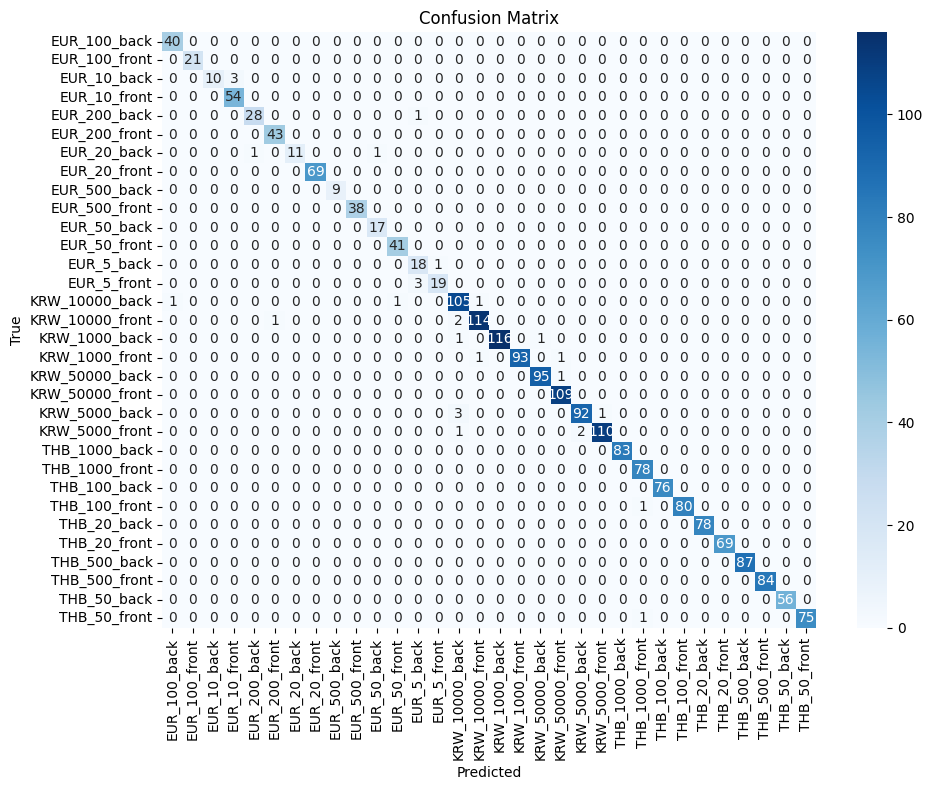

In [9]:
# 6. Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()